# Workbook Learning about Decision Tree ML (Categorical)
### Working with various algorithms and adjusting variable inputs and parameters to maximize accuracy

In [1]:
import numpy as np
import pandas as pd
import pandas_profiling   # error message no moduled named pandas_profiling => new error message below
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

%matplotlib inline



In [2]:
filepath = r"C:\Users\dufff\Course1\Demographic_Data.csv"
data = pd.read_csv(filepath)
data.head()

,in-store,age,items,amount,region
0,0,37,4,281.03,2
1,0,35,2,219.51,2
2,1,45,3,1525.70,4
3,1,46,3,715.25,3
4,1,33,4,1937.50,1


In [4]:
# DecisionTreeClassifier: Online vs Amount
data['age_bin'] = pd.cut(data['age'], bins=3, labels=['1','2','3'])
X = data.iloc[:,[3]]
y = data['in-store']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123)
algo = DecisionTreeClassifier(max_depth=4)
model = algo.fit(X_train,y_train)
preds = model.predict(X_test)  #Predictions
print(classification_report(y_test, preds, zero_division=True))

# from sklearn.tree import plot_tree
fig = plt.figure(figsize=(25,20))
tree = plot_tree(model, feature_names=X.columns, class_names=['on-line','in-store'], filled=True)
fig.savefig('model.png')



              precision    recall  f1-score   support

           0       0.68      0.74      0.71     11831
           1       0.72      0.66      0.69     12169

    accuracy                           0.70     24000
   macro avg       0.70      0.70      0.70     24000
weighted avg       0.70      0.70      0.70     24000



NameError: name 'plot_tree' is not defined

<Figure size 1800x1440 with 0 Axes>

              precision    recall  f1-score   support

           0       0.68      0.74      0.71     11831
           1       0.72      0.66      0.69     12169

    accuracy                           0.70     24000
   macro avg       0.70      0.70      0.70     24000
weighted avg       0.70      0.70      0.70     24000



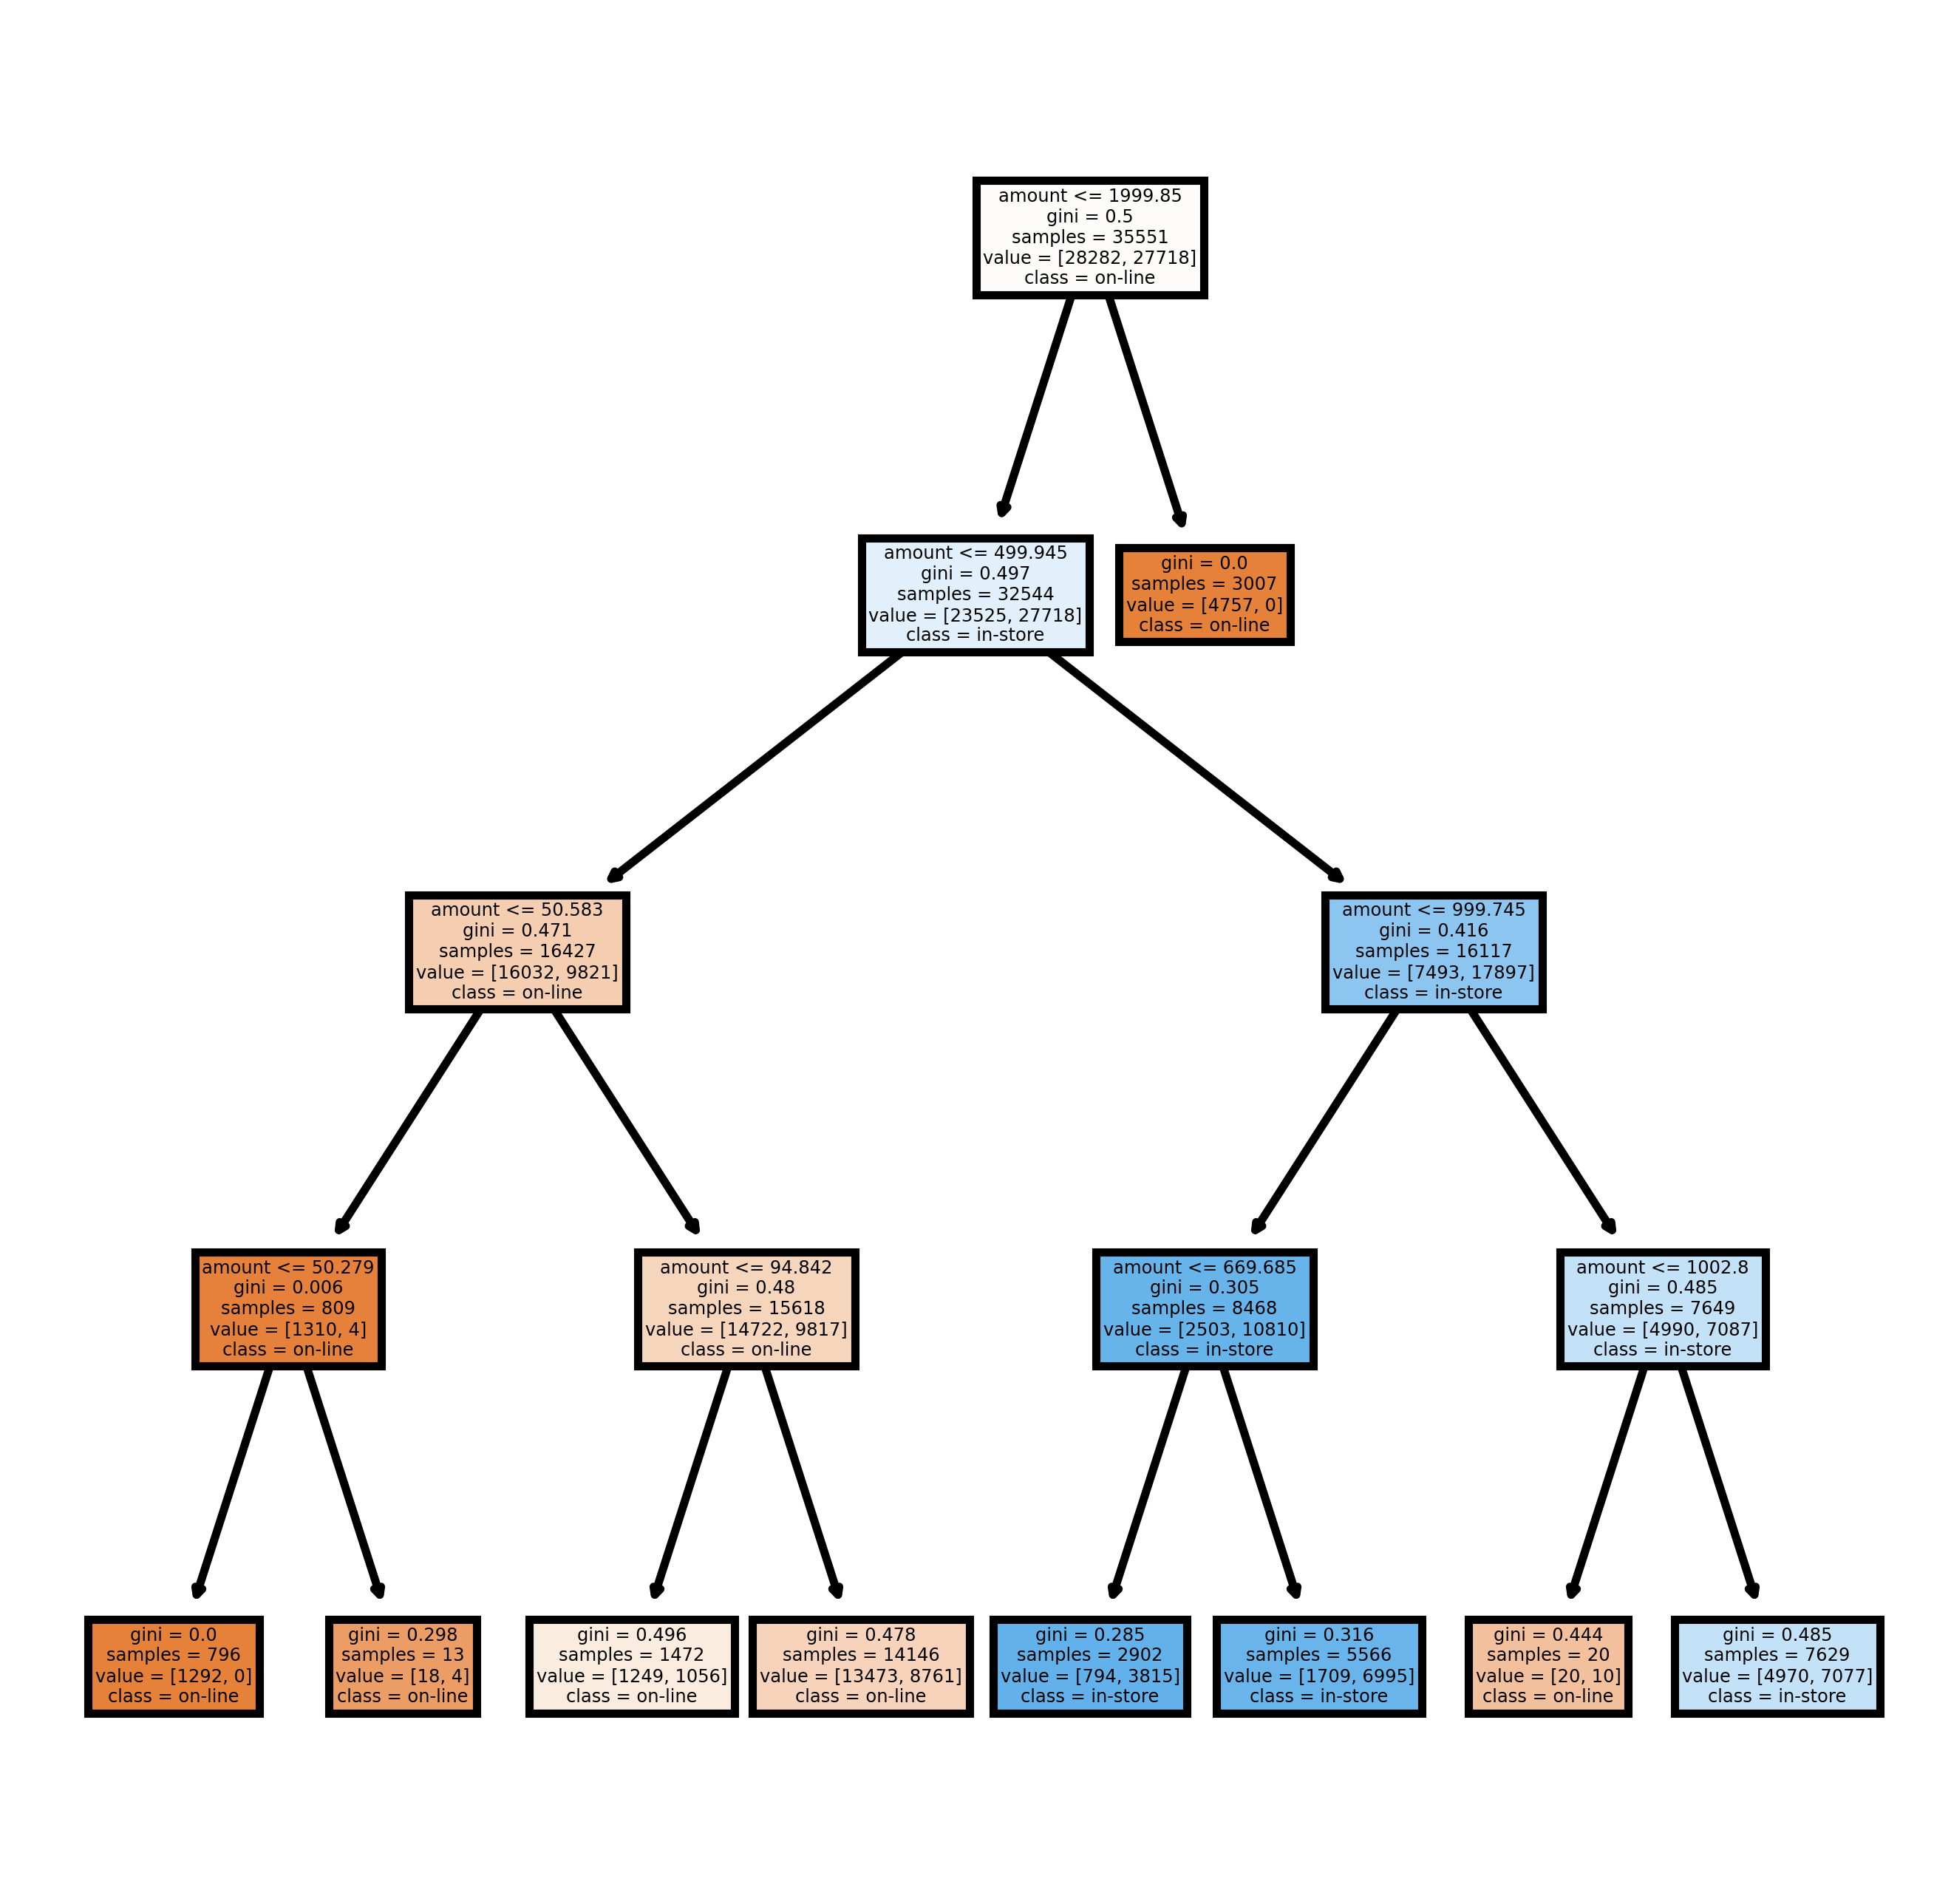

In [4]:
# RandomForrestClassifier: Online Vs Amount

from sklearn import tree # plot RandomForrest trees

# Arrange Data into Features Matrix and Target Vector
X = data.iloc[:,[3]]
y = data['in-store']

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = .30, random_state=123)

# Random Forests in `scikit-learn` (with N = )
rf = RandomForestClassifier(max_depth=4, n_estimators=10,
                            random_state=123)
rf.fit(X_train, Y_train)

preds = rf.predict(X_test)  #Predictions
print(classification_report(y_test, preds, zero_division=True))

# Print and Save Tree:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(rf.estimators_[0],
               feature_names=X.columns, 
               class_names=['on-line','in-store'],
               filled = True);
fig.savefig('rf_individualtree.png')





# All sales <= 50 and >=2000 were on-line

              precision    recall  f1-score   support

           0       1.00      0.73      0.85     11831
           1       0.80      1.00      0.89     12169

    accuracy                           0.87     24000
   macro avg       0.90      0.87      0.87     24000
weighted avg       0.90      0.87      0.87     24000



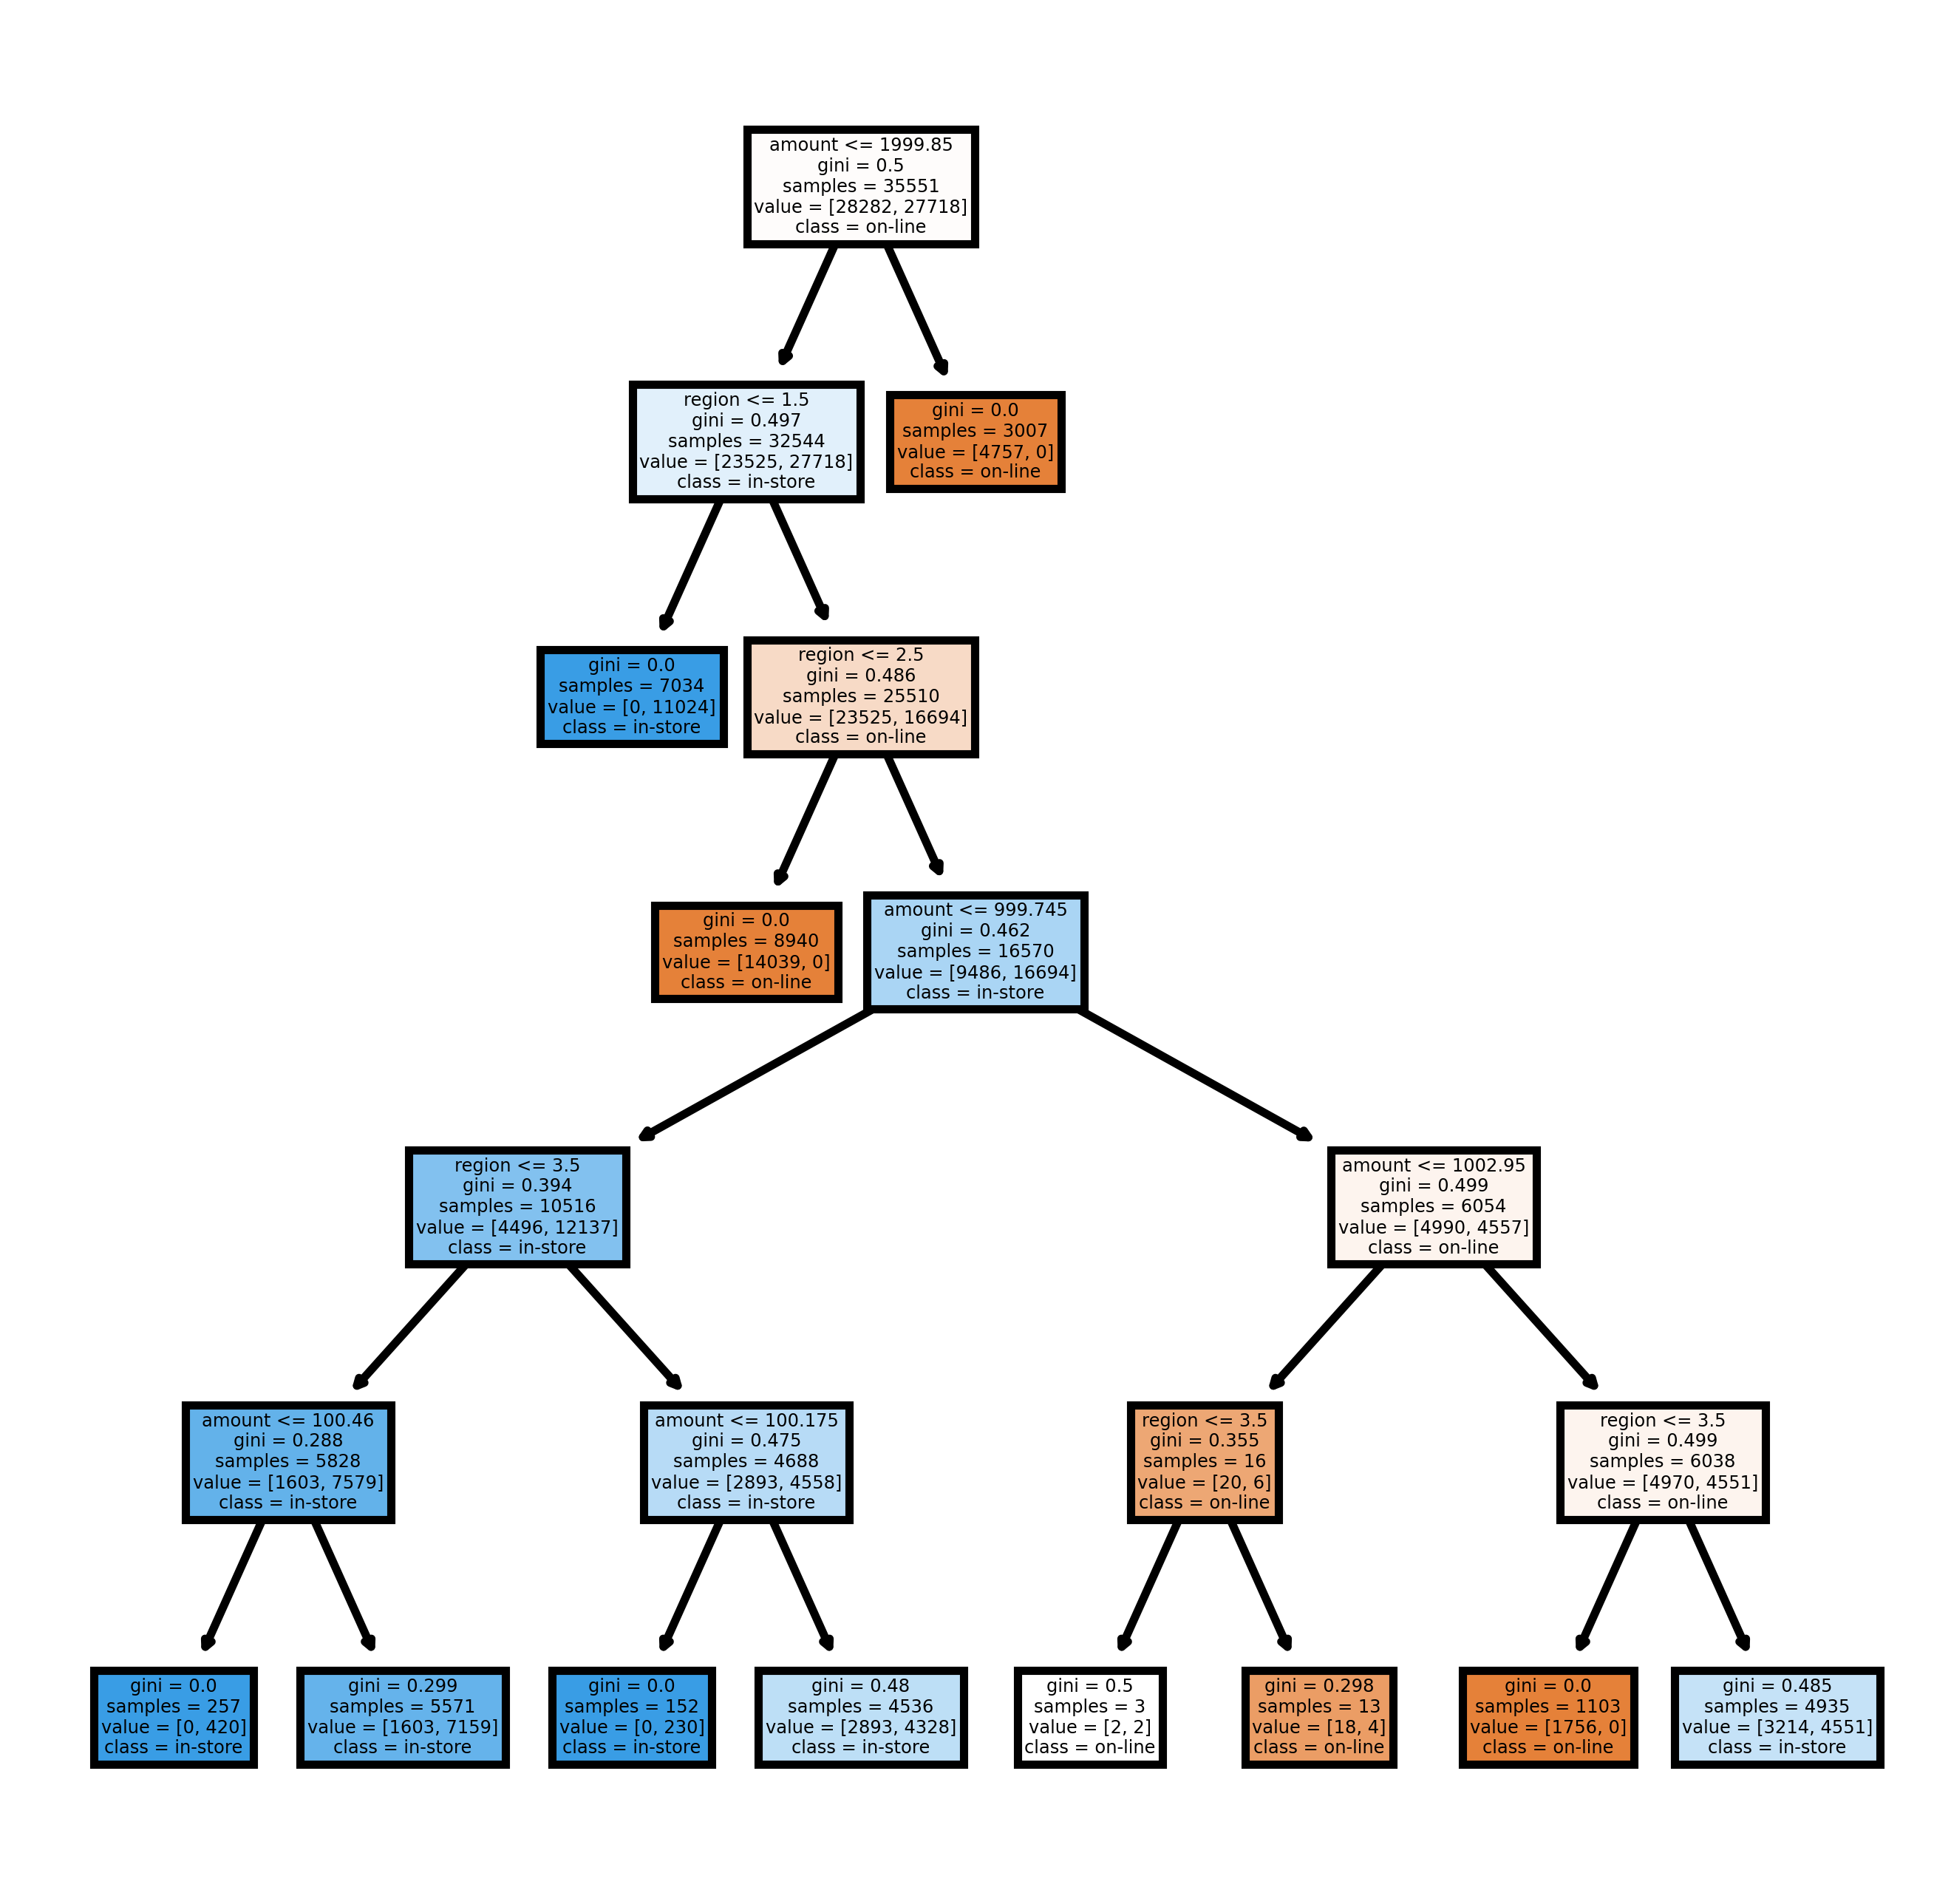

In [4]:
# RandomForrestClassifier: Online Vs Amount, Region

from sklearn import tree # RandomForrestClassifier

# Arrange Data into Features Matrix and Target Vector
X = data.iloc[:,[3,4]]
y = data['in-store']

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = .30, random_state=123)

# Random Forests in `scikit-learn` (with N = 10)
rf = RandomForestClassifier(max_depth=6, n_estimators=10,
                            random_state=123)
rf.fit(X_train, Y_train)

preds = rf.predict(X_test)  #Predictions
print(classification_report(y_test, preds, zero_division=True))

# Print and Save Tree:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(rf.estimators_[0],
               feature_names=X.columns, 
               class_names=['on-line','in-store'],
               filled = True);
fig.savefig('rf_individualtree.png')





              precision    recall  f1-score   support

           0       0.68      0.74      0.71     11831
           1       0.72      0.66      0.69     12169

    accuracy                           0.70     24000
   macro avg       0.70      0.70      0.70     24000
weighted avg       0.70      0.70      0.70     24000



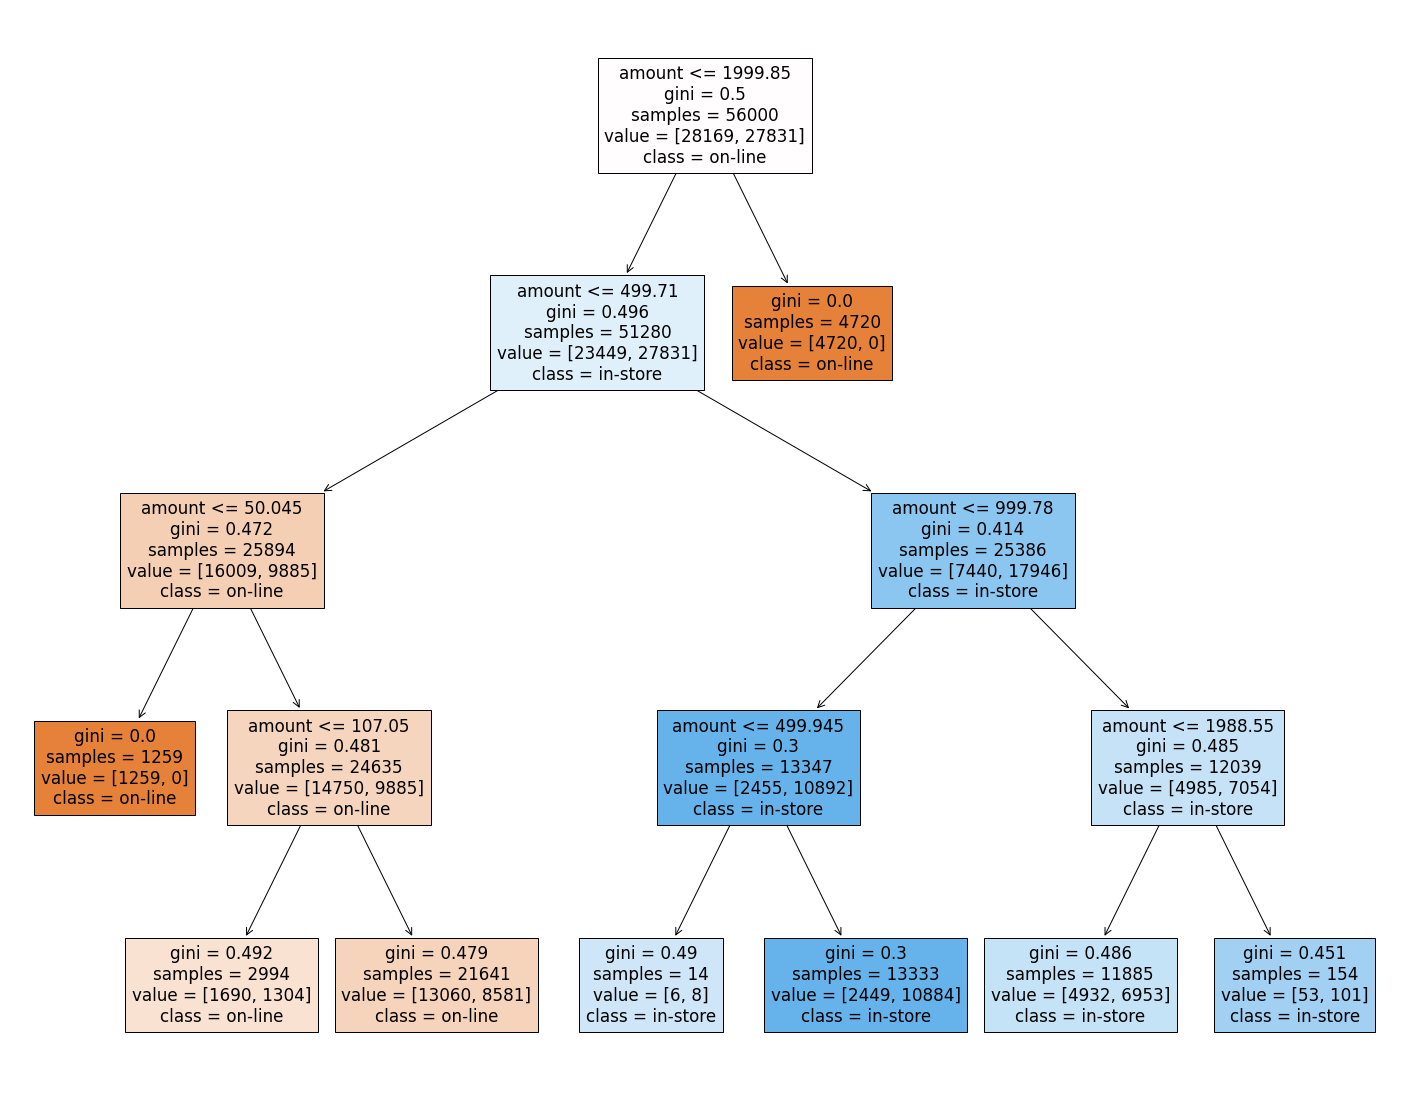

In [5]:
# In-store vs amount and region
data['age_bin'] = pd.cut(data['age'], bins=3, labels=['1','2','3'])
X = data.iloc[:,[3]]
y = data['in-store']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123)
algo = DecisionTreeClassifier(max_depth=4)
model = algo.fit(X_train,y_train)
preds = model.predict(X_test)  #Predictions
print(classification_report(y_test, preds, zero_division=True))


from sklearn.tree import plot_tree
fig = plt.figure(figsize=(25,20))
tree = plot_tree(model, feature_names=X.columns, class_names=['on-line','in-store'], filled=True)

In [7]:
# RandomForrestClassifier: Online Vs Amount (Young,Middle,Mature)

from sklearn import tree # RandomForrestClassifier

# Arrange Data into Features Matrix and Target Vector
data['age_bin'] = pd.cut(data['age'], bins=[0,30,60,90], labels=['1','2','3'])

X = data.iloc[:,[3]]
y = data['in-store']

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = .30, random_state=123)

# Random Forests in `scikit-learn` (with N = 10)
rf = RandomForestClassifier(max_depth=4, n_estimators=10,
                            random_state=123)
rf.fit(X_train, Y_train)

preds = rf.predict(X_test)  #Predictions
print(classification_report(y_test, preds, zero_division=True))

# from sklearn.ensemble import RandomForestClassifier # from xgboost import XGBClassifier
# model = RandomForestClassifier() # XGBClassifier()
# model.fit(X, y)
pd.data({'Variable':Xtrain.columns,
              'Importance':model.feature_importances_}).sort_values('Importance', ascending=False)


# Print and Save Tree:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(rf.estimators_[0],
               feature_names=X.columns, 
               class_names=['on-line','in-store'],
               filled = True);
fig.savefig('rf_individualtree.png')





              precision    recall  f1-score   support

           0       0.68      0.74      0.71     11831
           1       0.72      0.66      0.69     12169

    accuracy                           0.70     24000
   macro avg       0.70      0.70      0.70     24000
weighted avg       0.70      0.70      0.70     24000



AttributeError: module 'pandas' has no attribute 'data'

              precision    recall  f1-score   support

           0       1.00      0.00      0.00     11831
           1       0.46      0.26      0.34     12169
           2       0.00      1.00      0.00         0
           3       0.00      1.00      0.00         0

    accuracy                           0.13     24000
   macro avg       0.37      0.57      0.08     24000
weighted avg       0.73      0.13      0.17     24000



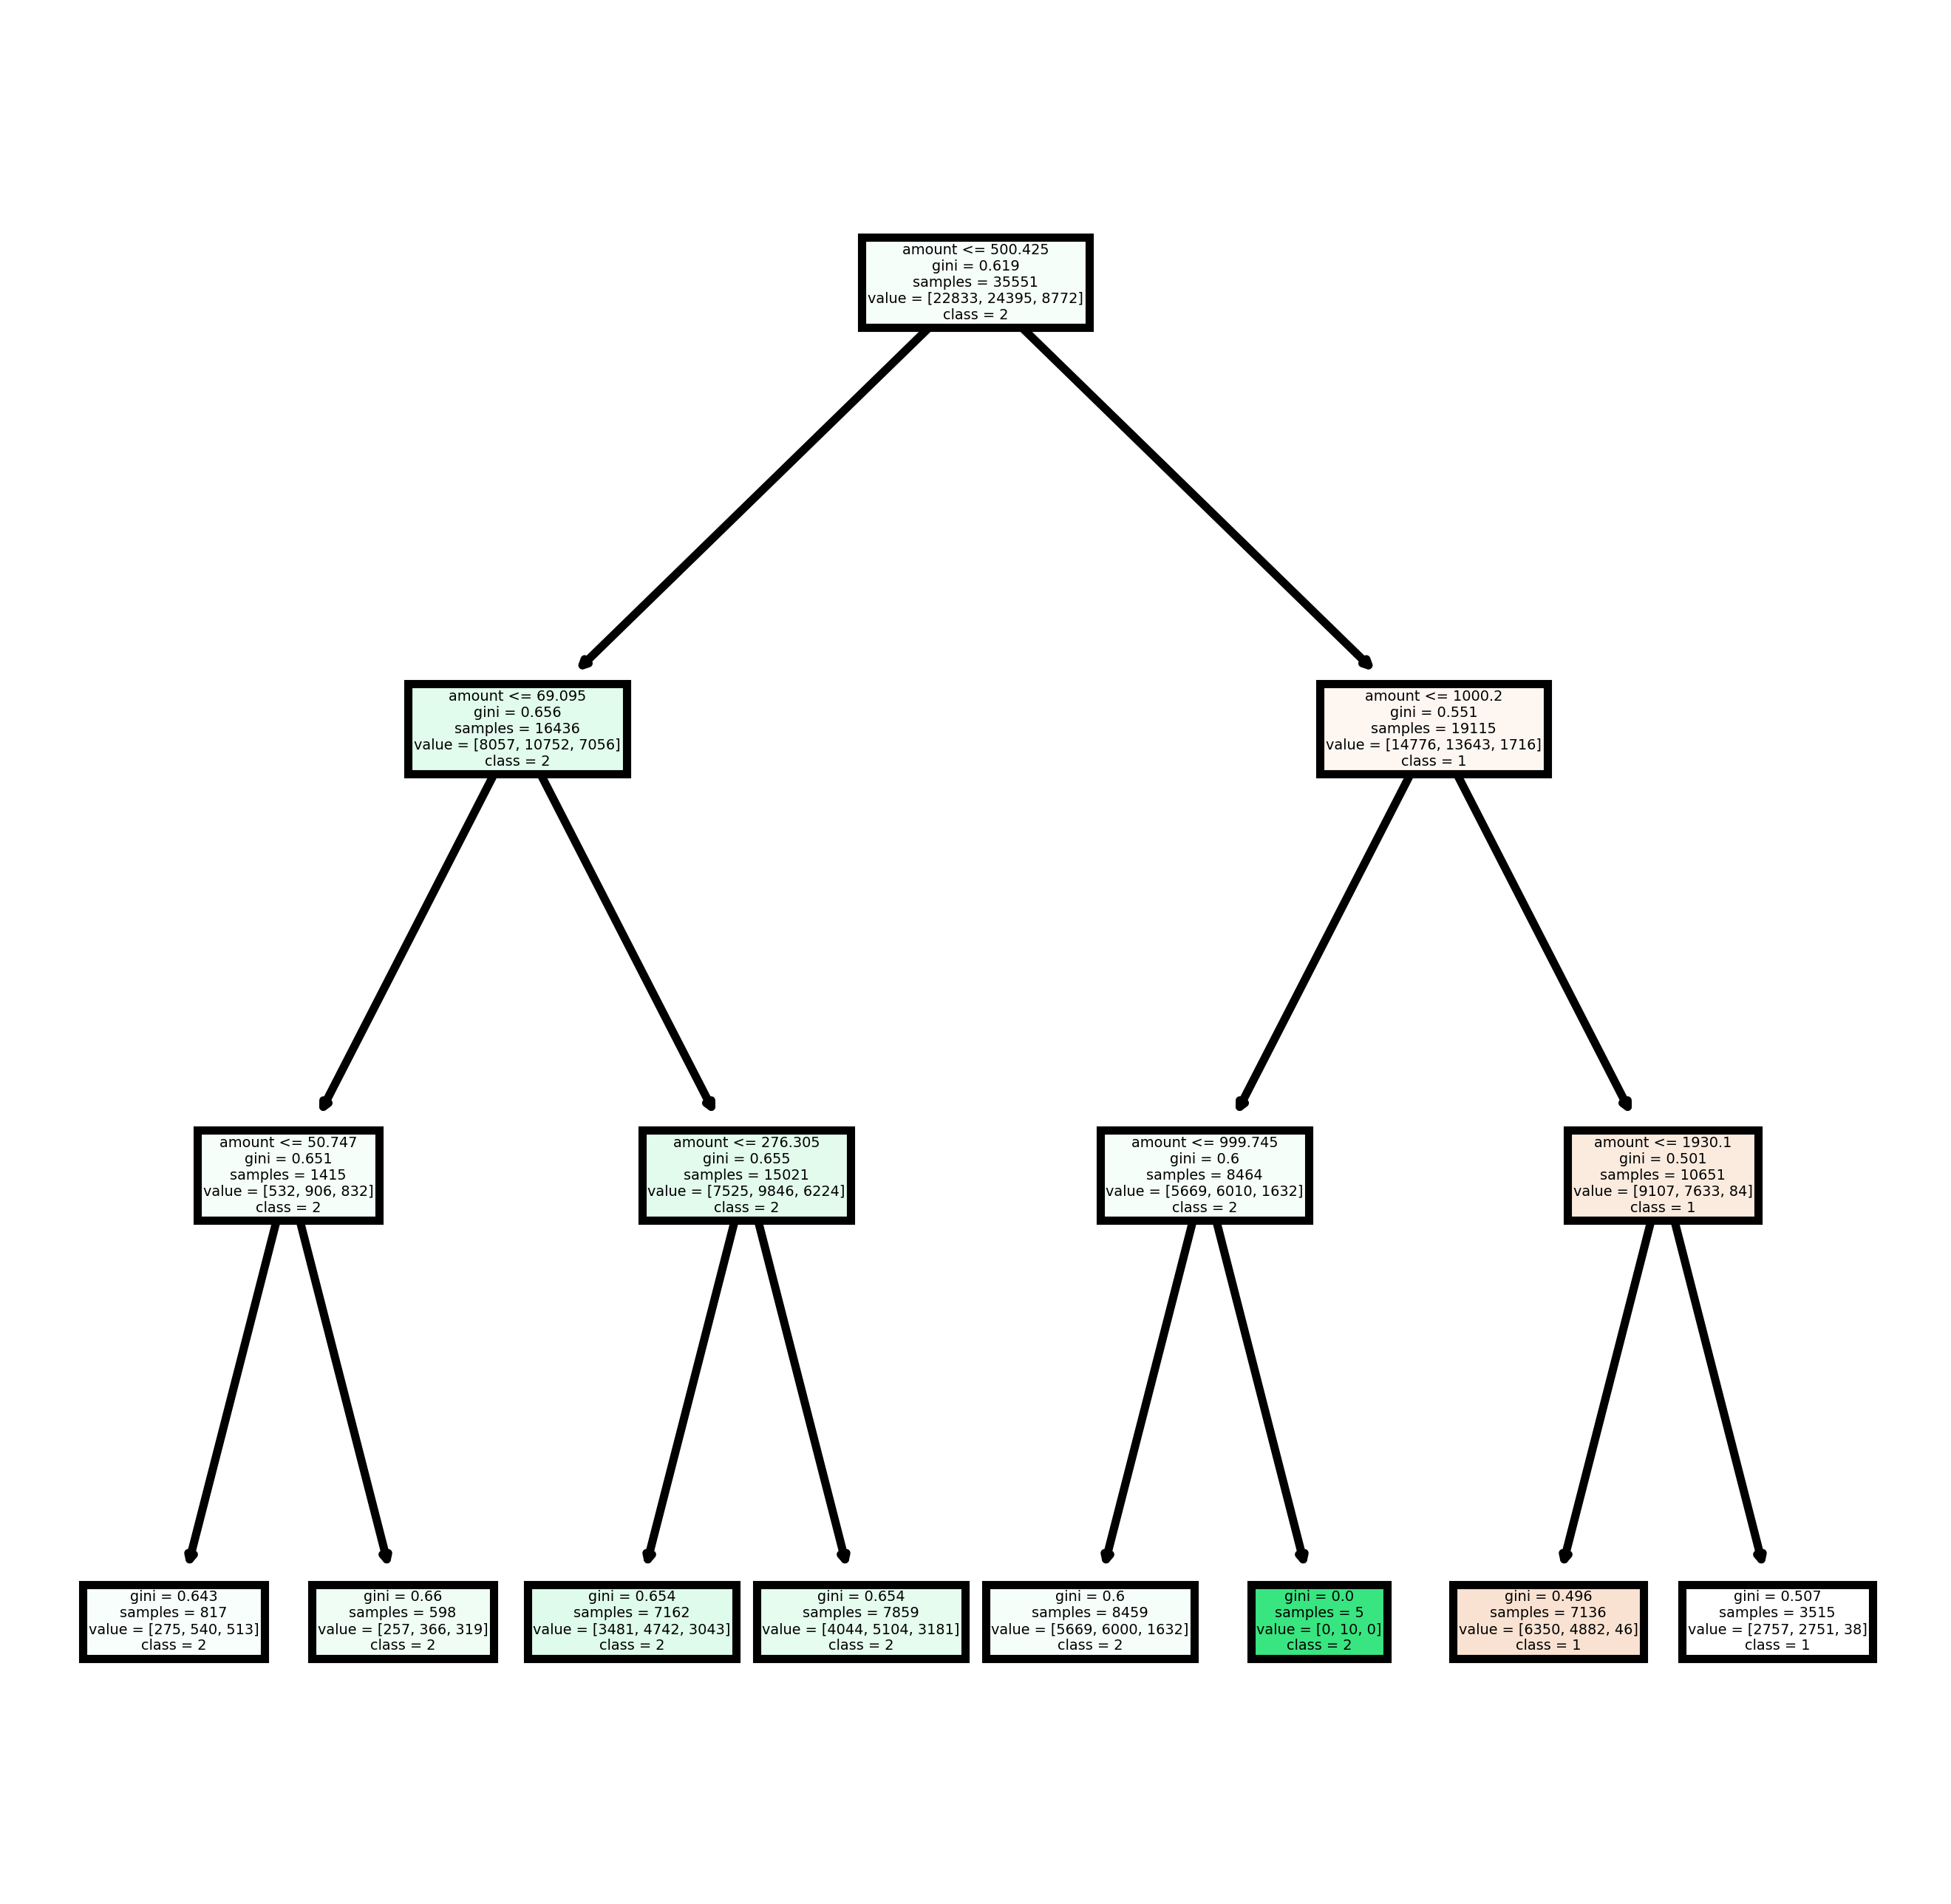

In [14]:
# RandomForrestClassifier: Age Vs Amount (Young,Middle,Mature)

from sklearn import tree # RandomForrestClassifier

# Arrange Data into Features Matrix and Target Vector
data['age_bin'] = pd.cut(data['age'], bins=3, labels=[1,2,3])
data

X = data.iloc[:,[3]]
y = data['age_bin']

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = .30, random_state=123)

# Random Forests in `scikit-learn` (with N = 10)
rf = RandomForestClassifier(max_depth=3, n_estimators=10,
                            random_state=123)
rf.fit(X_train, Y_train)

preds = rf.predict(X_test)  #Predictions
print(classification_report(y_test, preds, zero_division=True))

# Print and Save Tree:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(rf.estimators_[0],
               feature_names=X.columns, 
               class_names=['1','2','3'],
               filled = True);
fig.savefig('rf_individualtree.png')





All of region 3 sales greater than 1000 were on line

In [15]:
# Gradiant Bosst Classifier: Online vs amount, region

from sklearn.tree import plot_tree

data['age_bin'] = pd.cut(data['age'], bins=3, labels=['1','2','3'])
X = data.iloc[:,[3,4]]
y = data['in-store']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123)
algo = GradientBoostingClassifier(learning_rate=0.1, max_depth=5, random_state=123)
model = algo.fit(X_train,y_train)
preds = model.predict(X_test)  #Predictions
print(classification_report(y_test, preds, zero_division=True))


# Get the tree number 42
sub_tree_42 = model.estimators_[42, 0]

# Visualization
# Install graphviz: https://www.graphviz.org/download/

from xgboost import XGBClassifier
from xgboost import plot_tree




# from pydotplus import graph_from_dot_data
# from IPython.display import Image
# dot_data = export_graphviz(
#     sub_tree_42,
#     out_file=None, filled=True, rounded=True,
#     special_characters=True,
#     proportion=False, impurity=False, # enable them if you want
# )
# graph = graph_from_dot_data(dot_data)
# Image(graph.create_png())




# fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
# tree.plot_tree(rf.estimators_[0],
#                feature_names=X.columns, 
#                class_names=['on-line','in-store'],
#                filled = True);
# fig.savefig('rf_individualtree.png')


              precision    recall  f1-score   support

           0       1.00      0.74      0.85     11831
           1       0.80      1.00      0.89     12169

    accuracy                           0.87     24000
   macro avg       0.90      0.87      0.87     24000
weighted avg       0.89      0.87      0.87     24000



ModuleNotFoundError: No module named 'xgboost'

AttributeError: 'GradientBoostingClassifier' object has no attribute 'tree_'

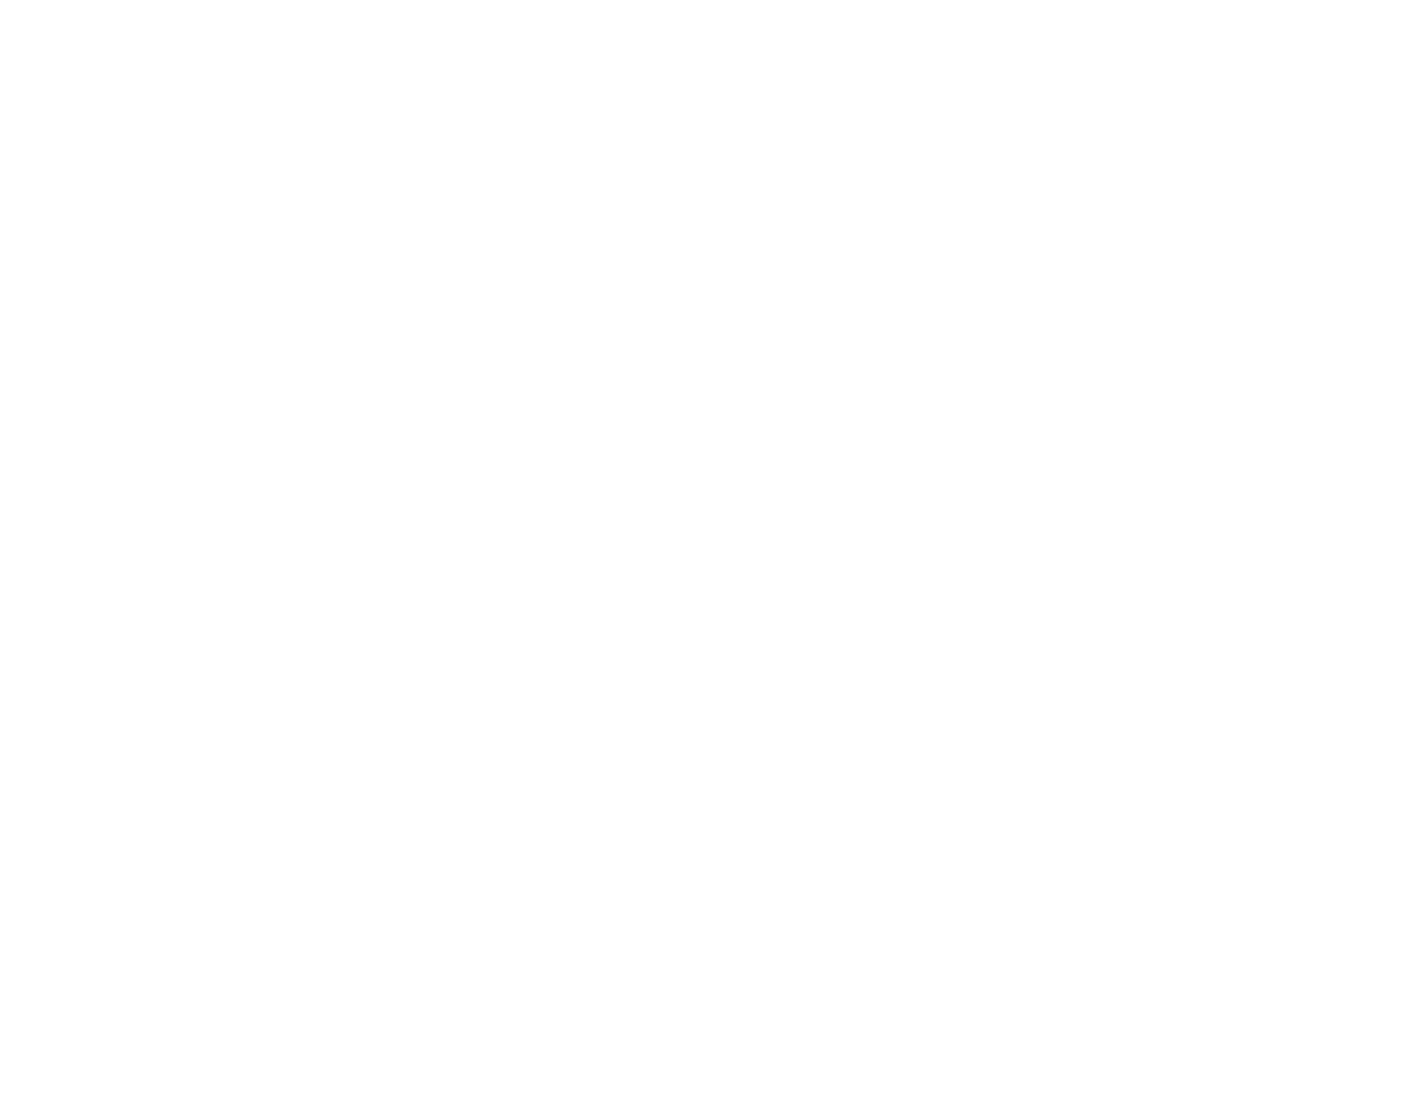

In [16]:
from sklearn.tree import plot_tree
fig = plt.figure(figsize=(25,20))
tree = plot_tree(model, feature_names=X.columns, class_names=['1','2'], filled=True)

In [ ]:
gradient_booster = GradientBoostingClassifier(learning_rate=0.1)
gradient_booster.get_params()

Investigation Sales > $2000

In [12]:
filepath = r"C:\Users\dufff\Course1\Demographic_Data.csv"
data = pd.read_csv(filepath)
# data.head()

data

,in-store,age,items,amount,region
0,0,37,4,281.03,2
1,0,35,2,219.51,2
2,1,45,3,1525.70,4
3,1,46,3,715.25,3
4,1,33,4,1937.50,1
...,...,...,...,...,...
79995,1,71,3,558.82,1
79996,0,59,7,1932.00,3
79997,0,54,1,414.16,2
79998,1,49,4,335.32,1


In [15]:
# All sales > $2000
# data2000 = data
data2000 = data.query('amount>=2000', inplace=False)
data2000


,in-store,age,items,amount,region
18,0,35,2,2791.6,4
21,0,49,5,2524.4,3
42,0,57,4,2289.2,3
57,0,53,5,2952.8,4
71,0,62,7,2591.3,3
...,...,...,...,...,...
79943,0,40,8,2314.6,3
79955,0,47,4,2829.0,4
79957,0,33,6,2590.5,4
79969,0,22,7,2906.4,4


In [58]:
data2000.count()

in-store    6751
age         6751
items       6751
amount      6751
region      6751
dtype: int64

In [10]:
d2grp = data2000.groupby(['in-store', 'region'], as_index=False).count()
d2grp

# tdr = data.groupby(['region'], as_index=False).sum()

,in-store,region,age,items,amount
0,0,3,2364,2364,2364
1,0,4,4387,4387,4387


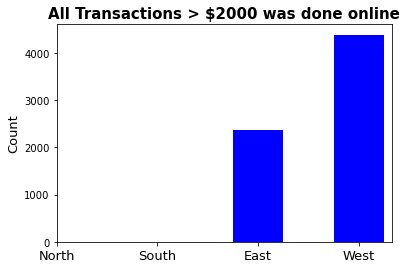

In [14]:
   # Bar Graph of Transactions > $2000 by region
import matplotlib.pyplot as plt
labels = ['North', 'South', 'East', 'West']
x=d2grp['region']
y=d2grp['amount']

# set width of bar
barWidth = 0.35
fig = plt.subplots(figsize =(8, 6))
 
# set height of bar
oline = online['on-line']
istore = online['in-store']
 
# Set position of bar on X axis
br1 = np.arange(len(oline))
br2 = [x + barWidth for x in br1]
 
# Make the plot
plt.bar(br1, oline, color ='lightblue', width = barWidth,
        edgecolor ='grey', label ='On-Line')
plt.bar(br2, istore, color ='b', width = barWidth,
        edgecolor ='grey', label ='In-Store')





plt.bar(x,y, 0.5, color = 'b')
plt.xticks([1,2,3,4],['North', 'South', 'East', 'West'], fontsize=13)
#plt.xlabel('Region', fontsize=12)
plt.ylabel('Count', rotation=90, fontsize = 13)
plt.title('All Transactions > $2000 was done online', fontweight ='bold', fontsize=15)
plt.show()

All online sales > 2000USD came from Regions 3&4.  Total of 6751 transactions (8.4% of all transactions)

In [5]:
d3grp = data2000.groupby(['region'], as_index=False).sum()
d3grp

,region,in-store,age,items,amount
0,3,0,95737,10638,5902553.7
1,4,0,177516,19859,10978395.4


Region 3&4 online buyers that purchased over 2K dollars had same average age=40.5 years, bought the same amount of items (4.5 items) and spent the same avg amount 2500USD.  however region 4 had over 2000 more of these transactions 4387 vs 2364.  

<function matplotlib.pyplot.show(close=None, block=None)>

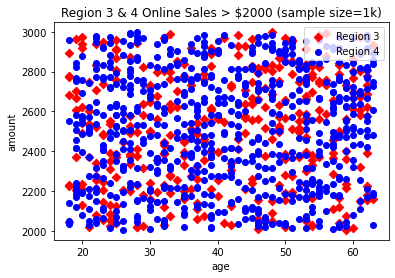

In [12]:

d2sample = data2000.sample(1000) # population of 6751
plt.scatter(d2sample['age'][d2sample.region == 3], d2sample['amount'][d2sample.region==3],
            marker='D',
            color='r',
            label = 'Region 3')
plt.scatter(d2sample['age'][d2sample.region==4], d2sample['amount'][d2sample.region==4],
           marker='o',
           color='b',
           label = 'Region 4')

plt.xlabel('age')
plt.ylabel('amount')
plt.title('Region 3 & 4 Online Sales > $2000 (sample size=1k)')
plt.legend()
plt.show



In [17]:

data50 = data.query('amount<=50', inplace=False)
data50


,in-store,age,items,amount,region
6,0,43,6,8.5472,2
76,0,30,4,46.8620,2
78,0,29,3,39.7710,2
80,0,47,3,13.5770,2
97,0,80,1,13.1090,2
...,...,...,...,...,...
79897,0,78,8,37.5830,2
79905,0,62,2,6.9559,2
79935,0,33,5,43.0760,2
79958,0,50,7,10.0030,2


In [49]:
d2grp = data50.groupby(['region'], as_index=False).count()
d2grp


,region,in-store,age,items,amount
0,2,1766,1766,1766,1766


All sales < 50USD occurred in Region 2...total of 1766 transactions (2.2% of all transactions)

In [18]:
data

,in-store,age,items,amount,region
0,0,37,4,281.03,2
1,0,35,2,219.51,2
2,1,45,3,1525.70,4
3,1,46,3,715.25,3
4,1,33,4,1937.50,1
...,...,...,...,...,...
79995,1,71,3,558.82,1
79996,0,59,7,1932.00,3
79997,0,54,1,414.16,2
79998,1,49,4,335.32,1
